<a href="https://colab.research.google.com/github/singhsukhendra/BreastCancerDetection/blob/master/Histopathologic_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/NMADALI97/Histopathologic-Breast-Cancer-Detection.git

Cloning into 'Histopathologic-Breast-Cancer-Detection'...
remote: Enumerating objects: 54, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 54 (delta 25), reused 11 (delta 2), pack-reused 0
Unpacking objects: 100% (54/54), done.


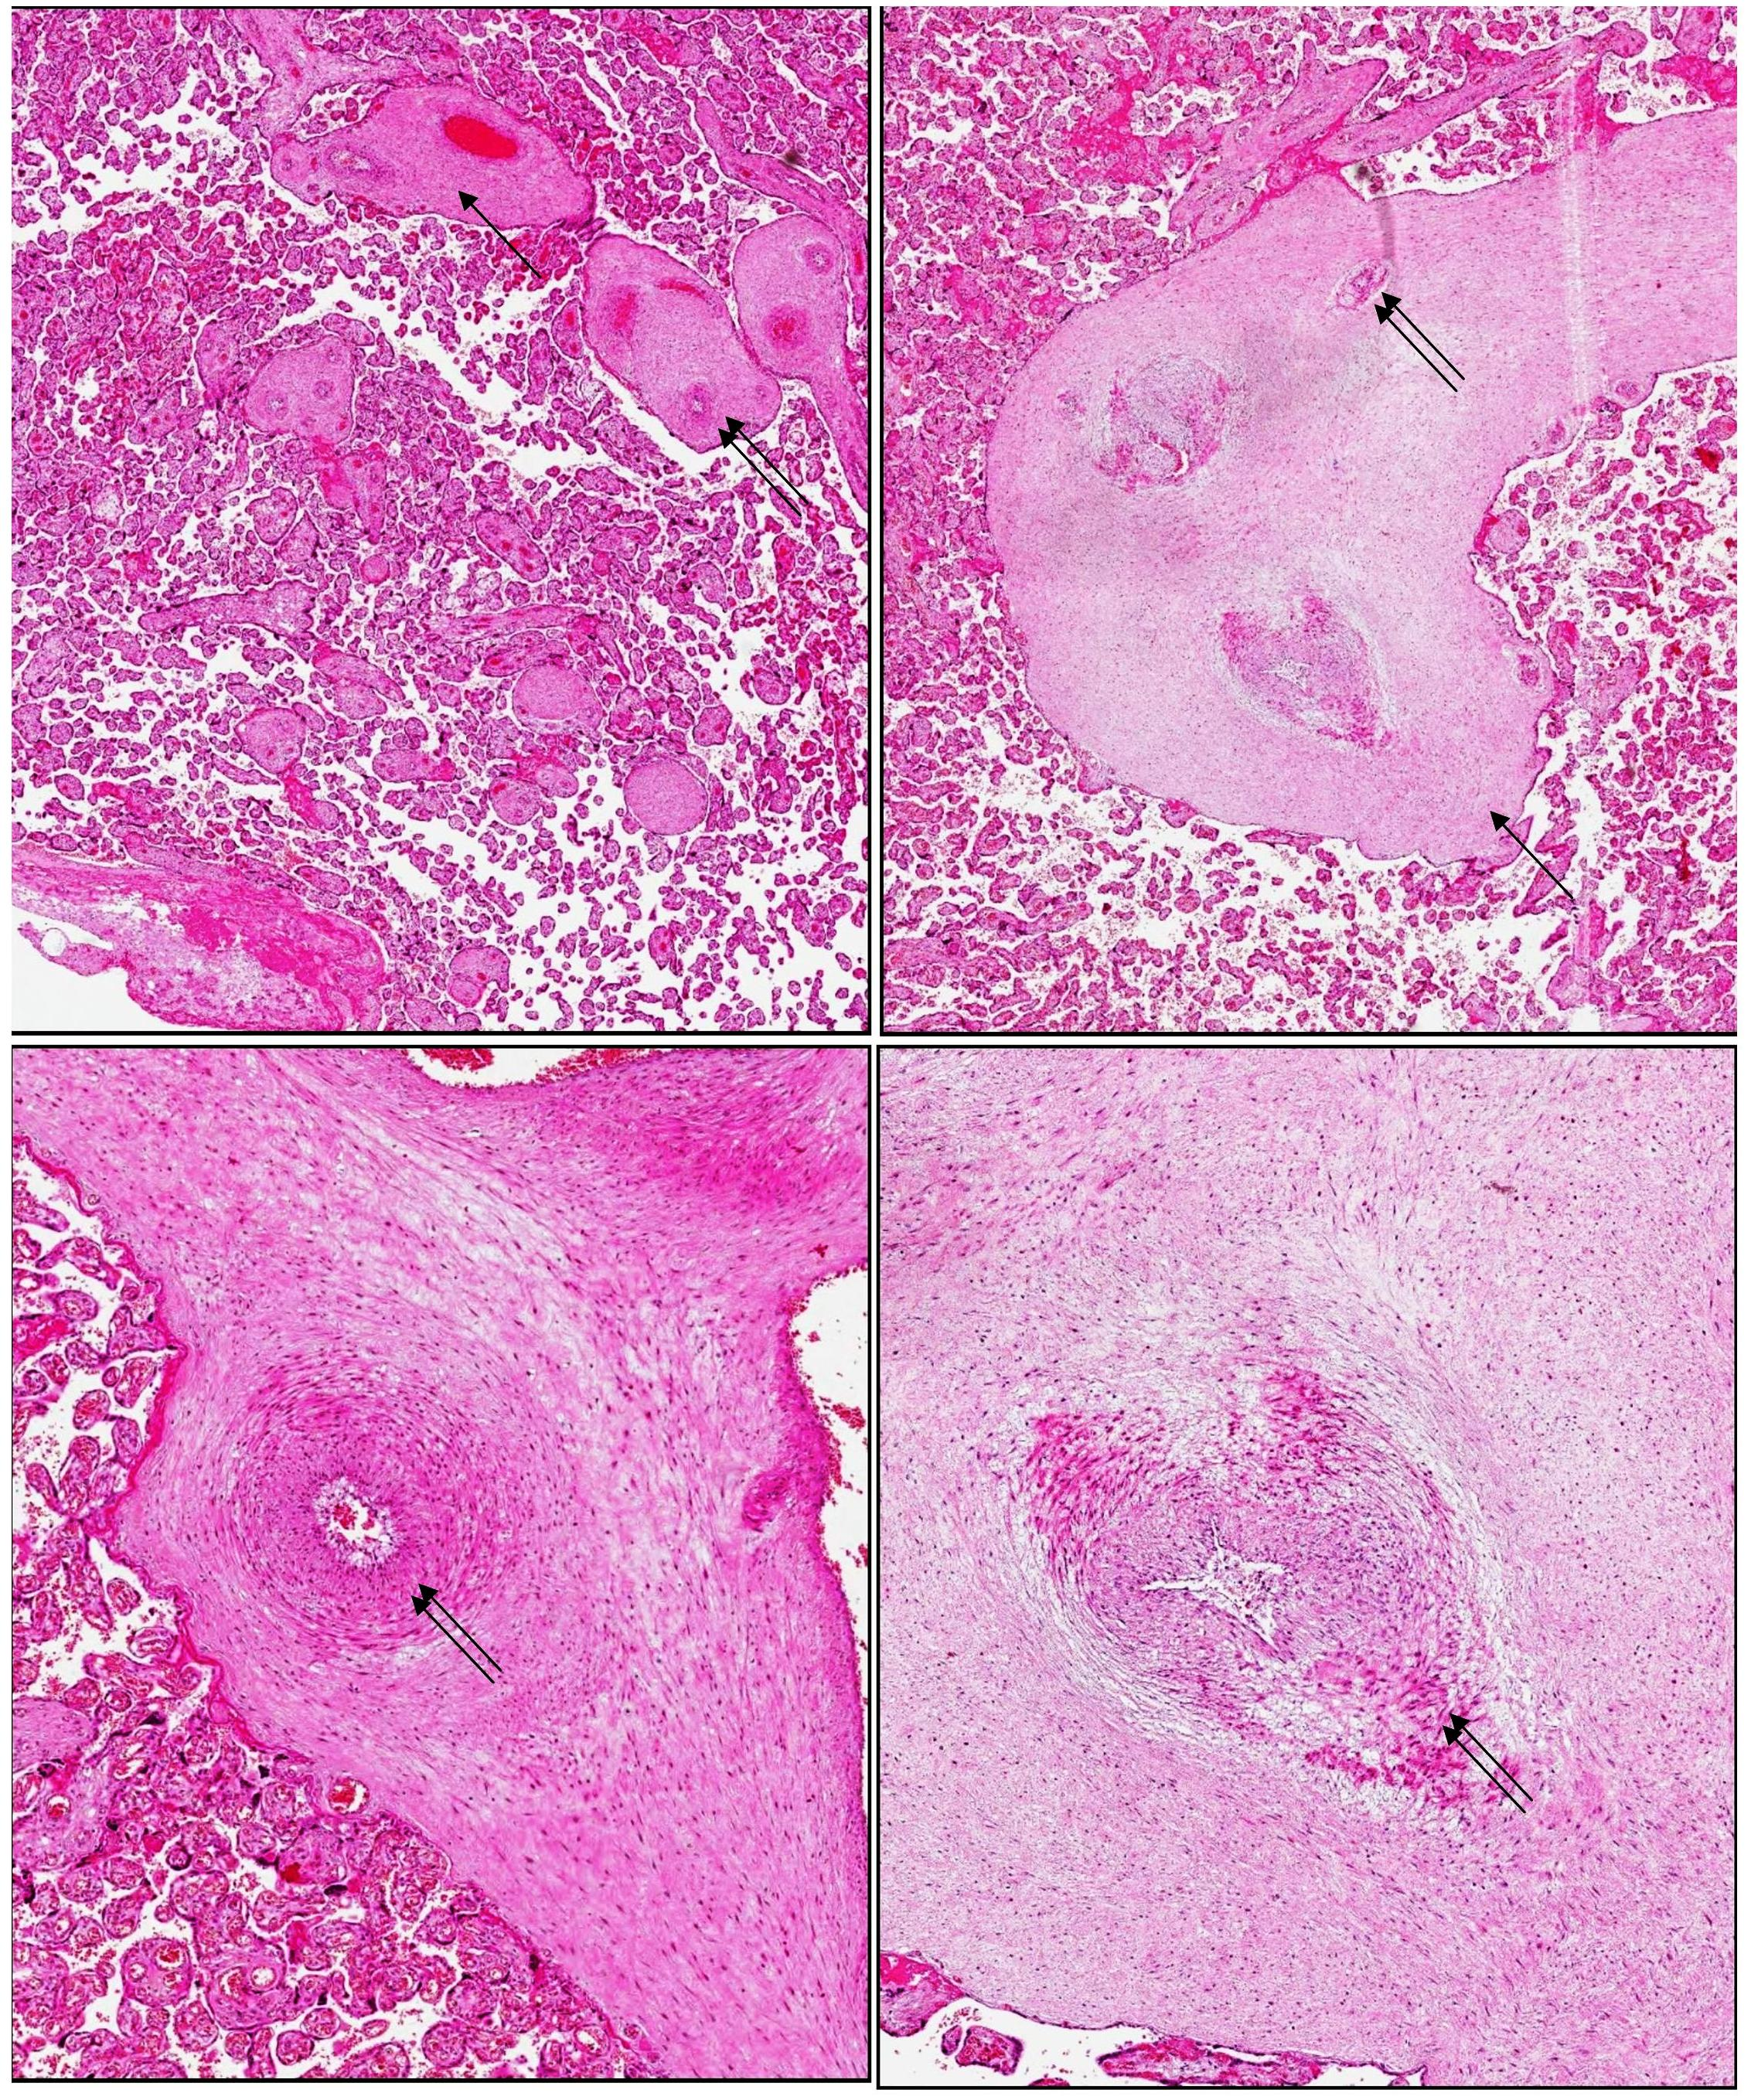

In [2]:
from IPython.display import Image
Image('/content/Histopathologic-Breast-Cancer-Detection/image1.jpg', width=200, height=200)

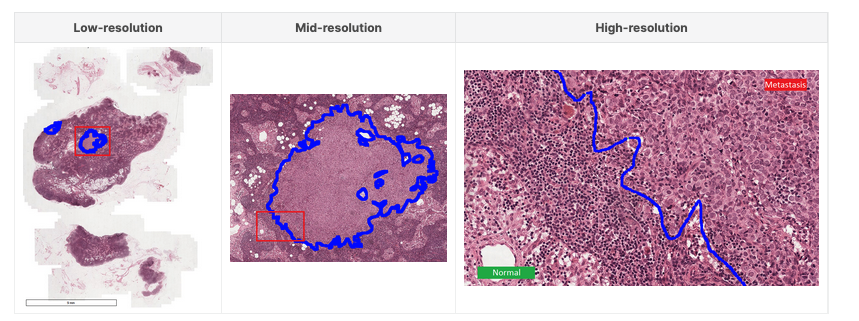

In [3]:
from IPython.display import Image
Image('/content/Histopathologic-Breast-Cancer-Detection/image2.png', width=500, height=200)

In [4]:
!gdown https://drive.google.com/uc?id=1BK7RVm8BYajRkmsiZWTGJ7tWozC3bNU_

import zipfile
with zipfile.ZipFile("breast-histopathology-images.zip","r") as zip_ref:
    zip_ref.extractall("breast-histopathology-images")

Downloading...
From: https://drive.google.com/uc?id=1BK7RVm8BYajRkmsiZWTGJ7tWozC3bNU_
To: /content/breast-histopathology-images.zip
3.33GB [00:54, 61.5MB/s]


In [5]:
import pandas as pd
train= pd.read_csv('/content/Histopathologic-Breast-Cancer-Detection/data/data.csv')
train.head()

patient_id                                               path  target
0        9254  breast-histopathology-images/IDC_regular_ps50_...       0
1       12867  breast-histopathology-images/IDC_regular_ps50_...       1
2       12749  breast-histopathology-images/IDC_regular_ps50_...       0
3       16533  breast-histopathology-images/IDC_regular_ps50_...       0
4        9261  breast-histopathology-images/IDC_regular_ps50_...       0

In [6]:
len(train)

222019

In [7]:
from os import listdir
files = listdir("/content/breast-histopathology-images/")
print(len(files))

280


In [8]:
base_path = "/content/breast-histopathology-images//IDC_regular_ps50_idx5/"
folder = listdir(base_path)
len(folder)

279

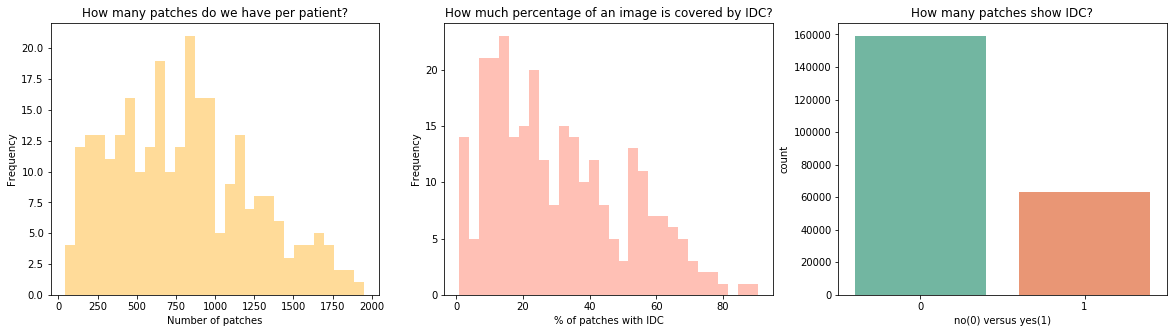

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cancer_perc = train.groupby("patient_id").target.value_counts()/ train.groupby("patient_id").target.size()
cancer_perc = cancer_perc.unstack()

fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(train.groupby("patient_id").size(), ax=ax[0], color="Orange", kde=False, bins=30)
ax[0].set_xlabel("Number of patches")
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many patches do we have per patient?");
sns.distplot(cancer_perc.loc[:, 1]*100, ax=ax[1], color="Tomato", kde=False, bins=30)
ax[1].set_title("How much percentage of an image is covered by IDC?")
ax[1].set_ylabel("Frequency")
ax[1].set_xlabel("% of patches with IDC");
sns.countplot(train.target, palette="Set2", ax=ax[2]);
ax[2].set_xlabel("no(0) versus yes(1)")
ax[2].set_title("How many patches show IDC?");

In [10]:
import numpy as np
def extract_coords(df):
    coord = df.path.str.rsplit("_", n=4, expand=True)
    coord = coord.drop([0, 1, 4], axis=1)
    coord = coord.rename({2: "x", 3: "y"}, axis=1)
    coord.loc[:, "x"] = coord.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    coord.loc[:, "y"] = coord.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    df.loc[:, "x"] = coord.x.values
    df.loc[:, "y"] = coord.y.values
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    base_path="breast-histopathology-images"
    path = base_path + "/"+ str(patient_id) + "/" + cancer_id
    files = listdir(path)
    dataframe = pd.DataFrame(files, columns=["filename"])
    path_names = path + "/" + dataframe.filename.values
    dataframe = dataframe.filename.str.rsplit("_", n=4, expand=True)
    dataframe.loc[:, "target"] = np.int(cancer_id)
    dataframe.loc[:, "path"] = path_names
    dataframe = dataframe.drop([0, 1, 4], axis=1)
    dataframe = dataframe.rename({2: "x", 3: "y"}, axis=1)
    dataframe.loc[:, "x"] = dataframe.loc[:,"x"].str.replace("x", "", case=False).astype(np.int)
    dataframe.loc[:, "y"] = dataframe.loc[:,"y"].str.replace("y", "", case=False).astype(np.int)
    return dataframe

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    patient_df = df_0.append(df_1)
    return patient_df
example = get_patient_dataframe(train.patient_id.values[0])
example.head()

x     y  target                                               path
0  3001  1651       0  breast-histopathology-images/9254/0/9254_idx5_...
1  2501  2101       0  breast-histopathology-images/9254/0/9254_idx5_...
2  1251  1101       0  breast-histopathology-images/9254/0/9254_idx5_...
3  1001  1001       0  breast-histopathology-images/9254/0/9254_idx5_...
4  2801  1651       0  breast-histopathology-images/9254/0/9254_idx5_...

In [11]:
example.describe()

x            y       target
count  1172.000000  1172.000000  1172.000000
mean   1830.820819  1194.984642     0.147611
std     950.174267   461.807879     0.354865
min      51.000000    51.000000     0.000000
25%     951.000000   851.000000     0.000000
50%    1751.000000  1201.000000     0.000000
75%    2651.000000  1551.000000     0.000000
max    3451.000000  2501.000000     1.000000

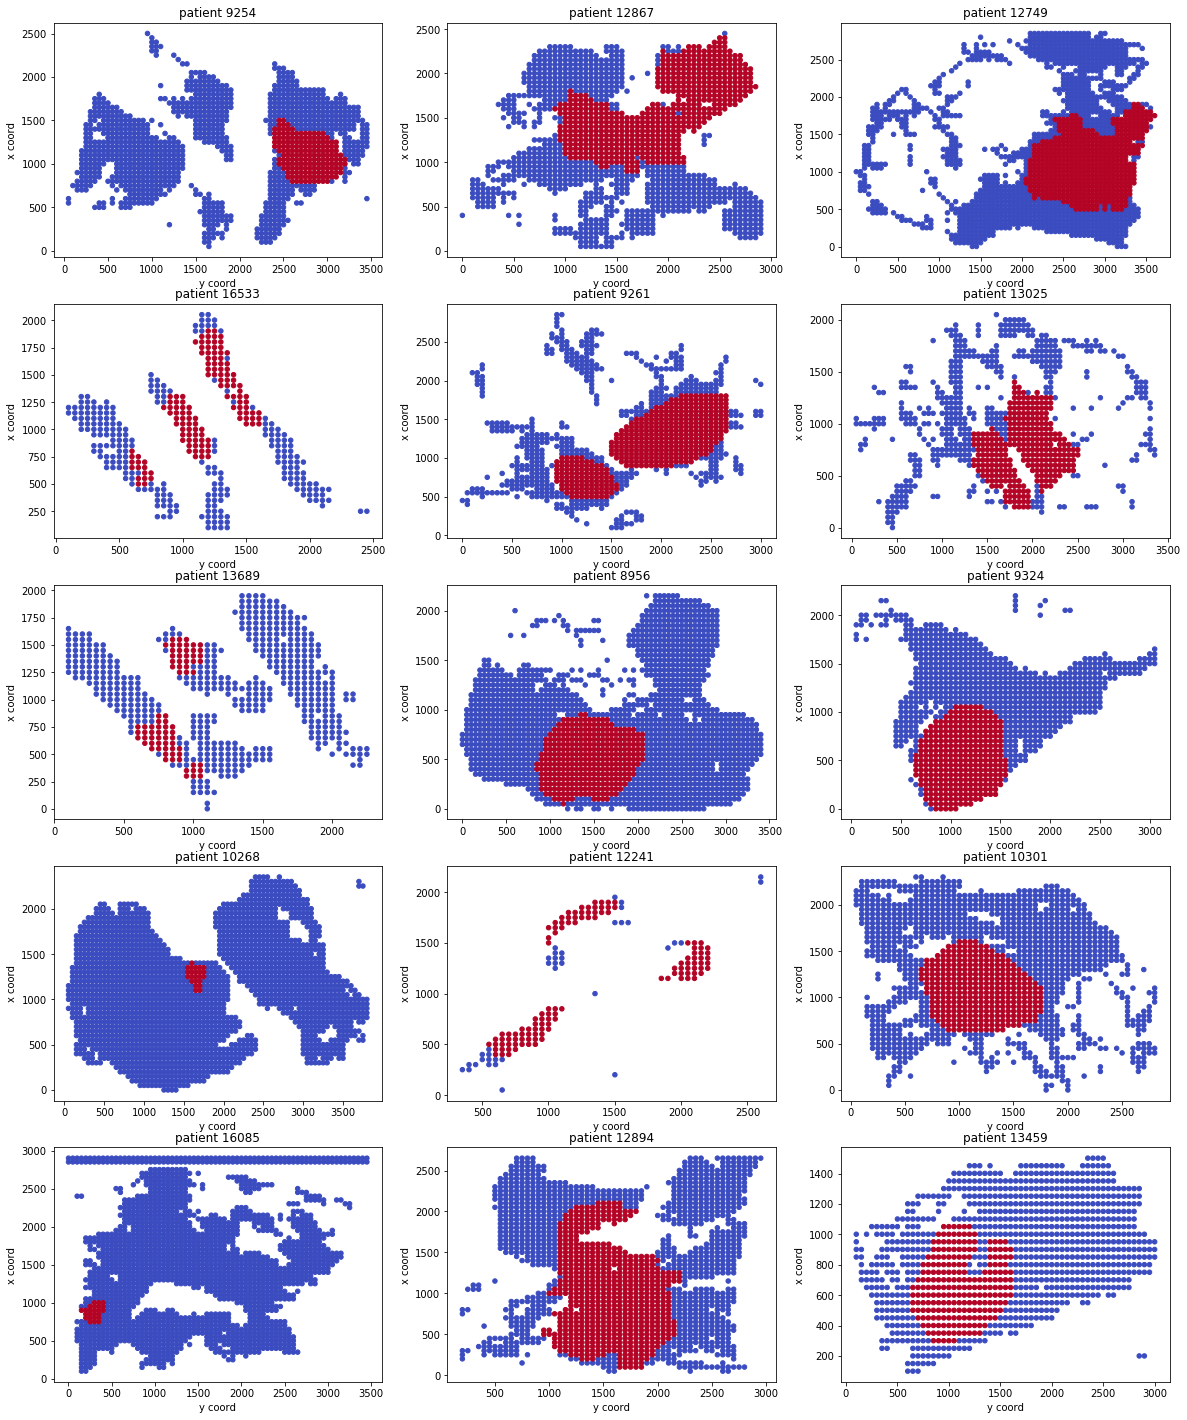

In [12]:
fig, ax = plt.subplots(5,3,figsize=(20, 25))

patient_ids = train.patient_id.unique()

for n in range(5):
    for m in range(3):
        patient_id = patient_ids[m + 3*n]
        example_df = get_patient_dataframe(patient_id)
        
        ax[n,m].scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
        ax[n,m].set_title("patient " + str(patient_id))
        ax[n,m].set_xlabel("y coord")
        ax[n,m].set_ylabel("x coord")

In [0]:
def visualise_breast_tissue(patient_id, pred_df=None):
    example_df = get_patient_dataframe(patient_id)
    max_point = [example_df.y.max()-1, example_df.x.max()-1]
    grid = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    mask = 255*np.ones(shape = (max_point[0] + 50, max_point[1] + 50, 3)).astype(np.uint8)
    if pred_df is not None:
        pred_df = pred_df.loc[pred_df.patient_id==patient_id].copy()
        mask_proba = np.zeros(shape = (example_df.y.max(), example_df.x.max())).astype(np.uint8)
    
    broken_patches = []
    for n in range(len(example_df)):
        try:
            image = imread(example_df.path.values[n])
            
            target = example_df.target.values[n]
            
            x_coord = np.int(example_df.x.values[n])
            y_coord = np.int(example_df.y.values[n])
            x_start = x_coord - 1
            y_start = y_coord - 1
            x_end = x_start + 50
            y_end = y_start + 50

            grid[y_start:y_end, x_start:x_end] = image
            if target == 1:
                mask[y_start:y_end, x_start:x_end, 0] = 150
                mask[y_start:y_end, x_start:x_end, 1] = 150
                mask[y_start:y_end, x_start:x_end, 2] = 250
            if pred_df is not None:
                proba = pred_df[
                    (pred_df.x.astype(np.int)==x_coord) & (pred_df.y.astype(np.int)==y_coord)
                ].proba.values
                print(proba)
                mask_proba[y_start, x_start] = np.float(proba)
                print(mask_proba[y_start, x_start])

        except ValueError:
            broken_patches.append(example_df.path.values[n])
    
    if pred_df is not None:
        return grid, mask, broken_patches, mask_proba
    else:
        return grid, mask, broken_patches

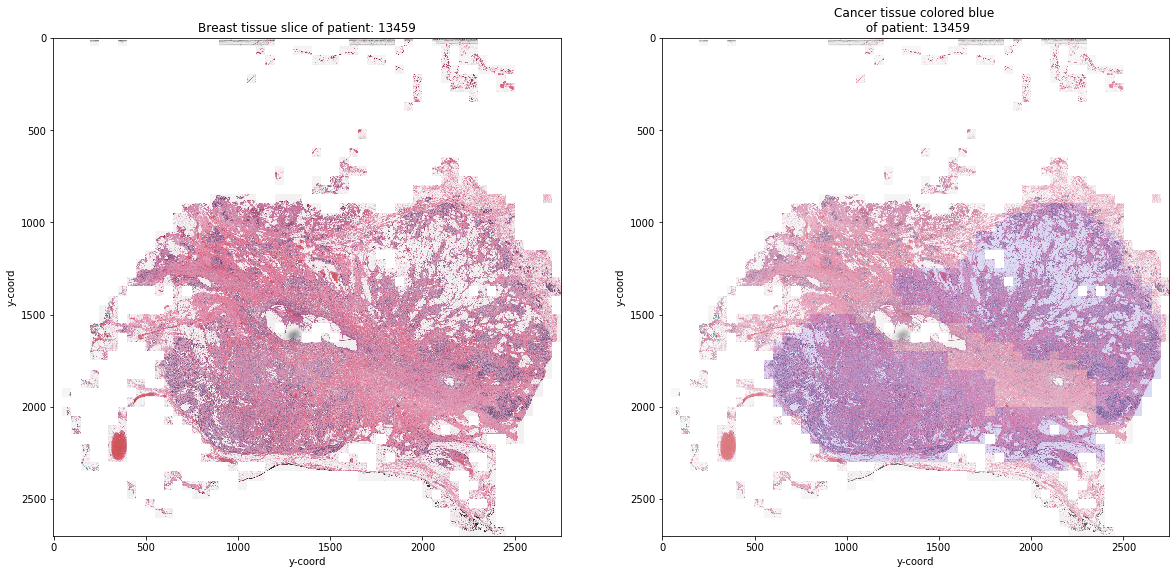

In [14]:
from skimage.io import imread
example = "13616"
grid, mask, broken_patches = visualise_breast_tissue(example)

fig, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(grid, alpha=0.9)
ax[1].imshow(mask, alpha=0.8)
ax[1].imshow(grid, alpha=0.7)
ax[0].grid(False)
ax[1].grid(False)
for m in range(2):
    ax[m].set_xlabel("y-coord")
    ax[m].set_ylabel("y-coord")
ax[0].set_title("Breast tissue slice of patient: " + str(patient_id))
ax[1].set_title("Cancer tissue colored blue \n of patient: " + str(patient_id));

In [0]:
import os
import cv2
import numpy as np
import pandas as pd
def loading_data(path, f_name):
    
    X_data=[]
    y_data=[]
    data_path = os.path.join(path, '{}.csv'.format(f_name))
    data = pd.read_csv(data_path)
    
    X_id = data['path'].values
    Y = data['target'].values
    
    for file in X_id:
       
        img = cv2.imread(file)
        img =cv2.resize(img , (50, 50))
        X_data.append(img)                    
    
    return (np.array(X_data)/ 255.,np.array(Y))

In [0]:
X_train, y_train = loading_data("/content/Histopathologic-Breast-Cancer-Detection/data", 'train')

In [0]:

X_test, y_test = loading_data("/content/Histopathologic-Breast-Cancer-Detection/data", 'test')

In [18]:
import keras
y_train = keras.utils.to_categorical(y_train,2)
y_test = keras.utils.to_categorical(y_test,2)

Using TensorFlow backend.


In [0]:
from __future__ import print_function
import numpy as np

import keras
from keras.datasets import mnist

from keras.models import Sequential 
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D 
from keras.optimizers import Adam, SGD, RMSprop

from keras.utils import np_utils 
from keras.callbacks import TensorBoard 
from keras import regularizers 
from time import time 

import matplotlib.pyplot as plt

In [0]:
np.random.seed(1671) # for reproducibility
# network and training

NB_EPOCH = 10 # number of epochs/episodes 
BATCH_SIZE = 32
VERBOSE = 1
VALIDATION_SPLIT=0.1 # how much TRAIN is reserved for VALIDATION


kernel_size = (3,3)
pool_size= (2,2)
first_filters = 32
second_filters = 64
third_filters = 128

dropout_conv = 0.3
dropout_dense = 0.3
IMAGE_SIZE=50

In [21]:
model = Sequential()
model.add(Conv2D(first_filters, kernel_size, activation = 'relu', 
                 input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(Conv2D(first_filters, kernel_size, activation = 'relu'))
model.add(MaxPooling2D(pool_size = pool_size)) 
model.add(Dropout(dropout_conv))

model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(Conv2D(second_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(Conv2D(third_filters, kernel_size, activation ='relu'))
model.add(MaxPooling2D(pool_size = pool_size))
model.add(Dropout(dropout_conv))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(dropout_dense))
model.add(Dense(2, activation = "softmax"))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 64)        18496     


In [22]:
from keras.callbacks import TensorBoard  
model.compile(Adam(lr=0.0001), loss='binary_crossentropy',metrics=['accuracy'])
        
logdir = "logs/"
tensorboard_callback = TensorBoard(log_dir=logdir)

history = model.fit(X_train,y_train, batch_size=BATCH_SIZE,epochs=NB_EPOCH,validation_split = VALIDATION_SPLIT,callbacks=[tensorboard_callback])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 72509 samples, validate on 8057 samples







Epoch 1/10
72509/72509 [==============================] - 678s 9ms/step - loss: 0.5092 - acc: 0.7544 - val_loss: 0.4896 - val_acc: 0.7860

Epoch 2/10
72509/72509 [==============================] - 664s 9ms/step - loss: 0.4324 - acc: 0.8105 - val_loss: 0.4539 - val_acc: 0.8055
Epoch 3/10
72509/72509 [==============================] - 664s 9ms/step - loss: 0.4025 - acc: 0.8258 - val_loss: 0.4769 - val_acc: 0.7746
Epoch 4/10
72509/72509 [==============================] - 661s 9ms/step - loss: 0.3917 - acc: 0.8323 - val_loss: 0.4021 - val_acc: 0.8260
Epoch 5/10
72509/72509 [==============================] - 661s 9ms/step - loss: 0.3817 - acc: 0.8378 - val_loss: 0.4166 - val_acc: 0.8132
Epoch 6/10
72509/72509 [==============================] - 662s 9ms/step - loss: 0.3742 - acc: 0.8418 - val_loss: 0.3753 - val_acc: 0.8377
Epoch 7/10
72509

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


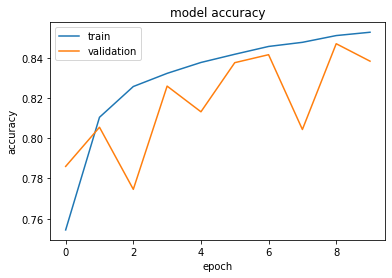

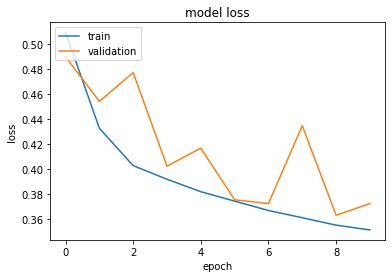

In [23]:
# tensorboard logs 
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE,batch_size=BATCH_SIZE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

20142/20142 [==============================] - 42s 2ms/step
Test score: 0.36756232080505996
Test accuracy: 0.8449508489604598


In [0]:
train= pd.read_csv('/content/Histopathologic-Breast-Cancer-Detection/data/train.csv')


patient_ids = train.patient_id.unique()
patient_id = patient_ids[0]
example_df = get_patient_dataframe(patient_id)

In [0]:

y_pred=[]
for row in example_df.values:
  img = cv2.imread(row[-1])
  img =cv2.resize(img , (50, 50))/255.
  y_pred.append(np.argmax(model.predict(img.reshape(1,50,50,3))))

Text(0, 0.5, 'x coord')

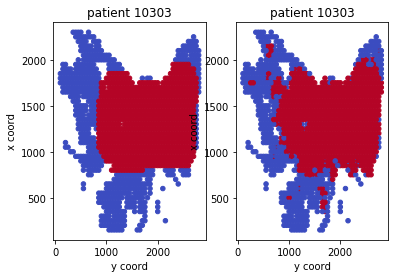

In [28]:
plt.subplot(1,2,1)
plt.scatter(example_df.x.values, example_df.y.values, c=example_df.target.values, cmap="coolwarm", s=20);
plt.title("patient " + str(patient_id))
plt.xlabel("y coord")
plt.ylabel("x coord")
plt.subplot(1,2,2)
plt.scatter(example_df.x.values, example_df.y.values, c=y_pred, cmap="coolwarm", s=20);
plt.title("patient " + str(patient_id))
plt.xlabel("y coord")
plt.ylabel("x coord")